# Get data from the Sage network!

The [Sage project](https://sagecontinuum.org/) is bringing AI to environmental sensors - and you can see their data!

From the project: In September of 2019, the National Science Foundation awarded a multi-institutional team led by Northwestern University a $9 million grant to launch the Sage project, a novel cyberinfrastructure created to exploit dramatic improvements in artificial intelligence technology. The goal: to build a continent-spanning network of smart sensors.

Sage test nodes will be deployed in environmental locations in California, Colorado, and Kansas and in urban settings in Illinois and Texas. The project will build on the open source technology platform used in the Array of Things project, which has deployed more than 100 sensors with edge computing capabilities within Chicago.

You can access Sage sensor data [here](https://portal.sagecontinuum.org/data0) by clicking on any of the data barsin the timelines. The page even has a Python code snippet to make your own analyses!

In [15]:
!pip install sage_data_client

In [16]:
import sage_data_client

One of the things Sage is doing is [tracking cloud cover](https://sagecontinuum.org/science/characterizing-clouds) from images captured in the field and, instead of storing relatively large images, converts those images to percent cloud cover using an AI-assisted algorithm.

## Example 1: see all cloud cover data

In [17]:
# Load in all the cloud cover data in SAGE's sensor network

# query and load data into pandas data frame
df = sage_data_client.query(
    start="-24h", # in the past 24 hours
    filter={
        "name": "env.coverage.cloud",
    }
)


In [18]:
# meta columns are expanded into meta.fieldname. for example, here we print the unique nodes
print(df["meta.vsn"].unique())

['W02C' 'W01B' 'W024' 'W021' 'W019' 'W02B' 'W07F' 'W06F' 'W084' 'W06A'
 'W067' 'W07A' 'W07D' 'W07B' 'W07E' 'W081' 'W083' 'W07C' 'W097' 'V004'
 'V005' 'V003']


What do this data look like?

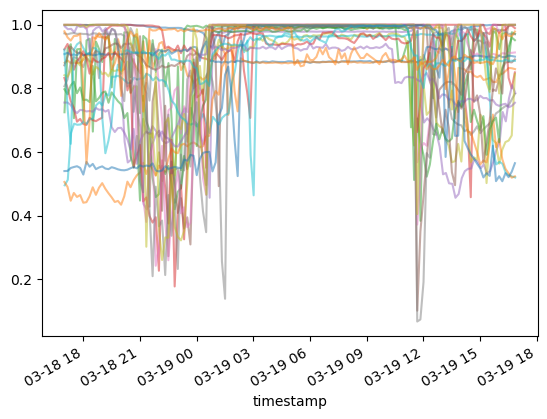

In [19]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
df.groupby(by='meta.vsn').plot(x='timestamp', y='value', alpha=0.5, legend=False, ax=ax);

# Example 2: see a timeline of one station's data

In [23]:
w02b = sage_data_client.query(
    start="-180d", # in the past 180 days
    filter={
        "plugin": "registry.sagecontinuum.org/seonghapark/cloud-cover:0.1.3.*",
        "vsn": "W02B"
    }
)

In [24]:
w02b.head()

,timestamp,name,value,meta.host,meta.job,meta.node,meta.plugin,meta.task,meta.vsn,meta.zone
0,2023-09-21 17:00:15.648023040+00:00,env.coverage.cloud,1.0000,000048b02d15bdaa.ws-nxcore,cloud-cover-top,000048b02d15bdaa,registry.sagecontinuum.org/seonghapark/cloud-c...,cloud-cover-top,W02B,core
1,2023-09-21 17:10:16.376038656+00:00,env.coverage.cloud,1.0000,000048b02d15bdaa.ws-nxcore,cloud-cover-top,000048b02d15bdaa,registry.sagecontinuum.org/seonghapark/cloud-c...,cloud-cover-top,W02B,core
2,2023-09-21 17:20:16.742439680+00:00,env.coverage.cloud,1.0000,000048b02d15bdaa.ws-nxcore,cloud-cover-top,000048b02d15bdaa,registry.sagecontinuum.org/seonghapark/cloud-c...,cloud-cover-top,W02B,core
3,2023-09-21 17:30:15.402942208+00:00,env.coverage.cloud,1.0000,000048b02d15bdaa.ws-nxcore,cloud-cover-top,000048b02d15bdaa,registry.sagecontinuum.org/seonghapark/cloud-c...,cloud-cover-top,W02B,core
4,2023-09-21 17:40:15.700656896+00:00,env.coverage.cloud,0.9995,000048b02d15bdaa.ws-nxcore,cloud-cover-top,000048b02d15bdaa,registry.sagecontinuum.org/seonghapark/cloud-c...,cloud-cover-top,W02B,core


<Axes: xlabel='timestamp'>

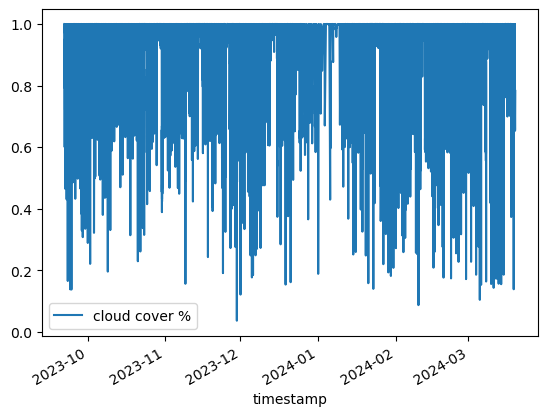

In [25]:
w02b[w02b['name'] =='env.coverage.cloud'].plot(x='timestamp', y='value', label='cloud cover %')